In [1]:
%pylab inline
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


#Aufgabenblatt 6

## 1. Perkolation in 2 Dimensionen

Führen Sie eine Perkolations-Simulation auf einem quadratischen Gitter der Größe $L \times L$ in 2 Dimensionen aus, bei der Sie mit der Wahrscheinlichkeit $p$ einen Gitterplatz besetzen, bzw. mit $1-p$ unbesetzt lassen.

In [2]:
class Experiment:
    def __init__(self, L, p):
        self.L = L
        self.p = p
        self.gitter = np.where(np.random.uniform(size=[L,L]) <= p, 1, 0)
        self._clusters = None
        self._clusterSizes = None
    def perkoliert(self):
        c = self.clusters()
        return len(
            #Erzeuge ein Set aus der Linken Spalte und schneide es mit dem set der rechten Spalte. 
            #Wenn Irgendwas ausser 0=kein cluster im Set ist perkoliert es.
            (set(c[0, :]) & set(c[self.L - 1, :])) - set([0])
        ) > 0 or len(
            (set(c[:, 0]) & set(c[:, self.L - 1])) - set([0])
        ) > 0
    def clusters(self):
        if self._clusters is None:
            self._findClusters()
        return self._clusters
    def clusterSizes(self):
        if self._clusterSizes is None:
            self._findClusters()
        return self._clusterSizes
    def _findClusters(self):
        self._clusters = np.zeros(shape=(self.L, self.L), dtype=np.int32)
        self._clusterSizes = []
        for i in range(self.L):
            for j in range(self.L):
                if self._clusters[i,j] == 0 and self.gitter[i,j] > 0:
                    #Gitterpunkt ist gesetzt, aber Cluster noch nicht. Starte Cluster hier
                    cluster = self._findCluster(i,j)
                    self._clusterSizes.append(len(cluster))
                    clusterId = len(self._clusterSizes)
                    for x, y in cluster:
                        self._clusters[x, y] = clusterId
                    
    def _getNachbarn(self, x, y):
        nachbarn = set()
        if x > 0:
            nachbarn.add((x - 1, y))
        if x < self.L - 1:
            nachbarn.add((x + 1, y))
        if y > 0:
            nachbarn.add((x, y - 1))
        if y < self.L - 1:
            nachbarn.add((x, y + 1))
        return nachbarn
    def _findCluster(self, x, y):
        visited = set()
        current = set([(x, y)])
        while len(current) > 0:
            nextStep = set()
            for n in current:
                if self.gitter[n[0], n[1]] > 0:
                    visited.add(n)
                    nextStep |= self._getNachbarn(*n)
            current = nextStep.difference(visited)
        return visited

**a.)** Variieren Sie die Besetzungswahrscheinlichkeit $p$ im Bereich $[0.3, \dots, 0.8]$ für Systemgrößen $L=10,\dots,50$ mit $\Delta L = 10$.

**b.)** Schauen Sie sich beispielhaft einige der gefundenen Konfigurationen graphisch an

**c.)** Identifizieren Sie die existierenden Cluster im System mit dem Backtracking-Algorithmus

In [3]:
numP = 5
ps = np.linspace(0.3,0.8,numP)
Ls = [10, 20, 30, 40, 50]

experimente = defaultdict(dict)
for i, p in enumerate(ps):
    for j, L in enumerate(Ls):
        experimente[i][j] = Experiment(L, p)

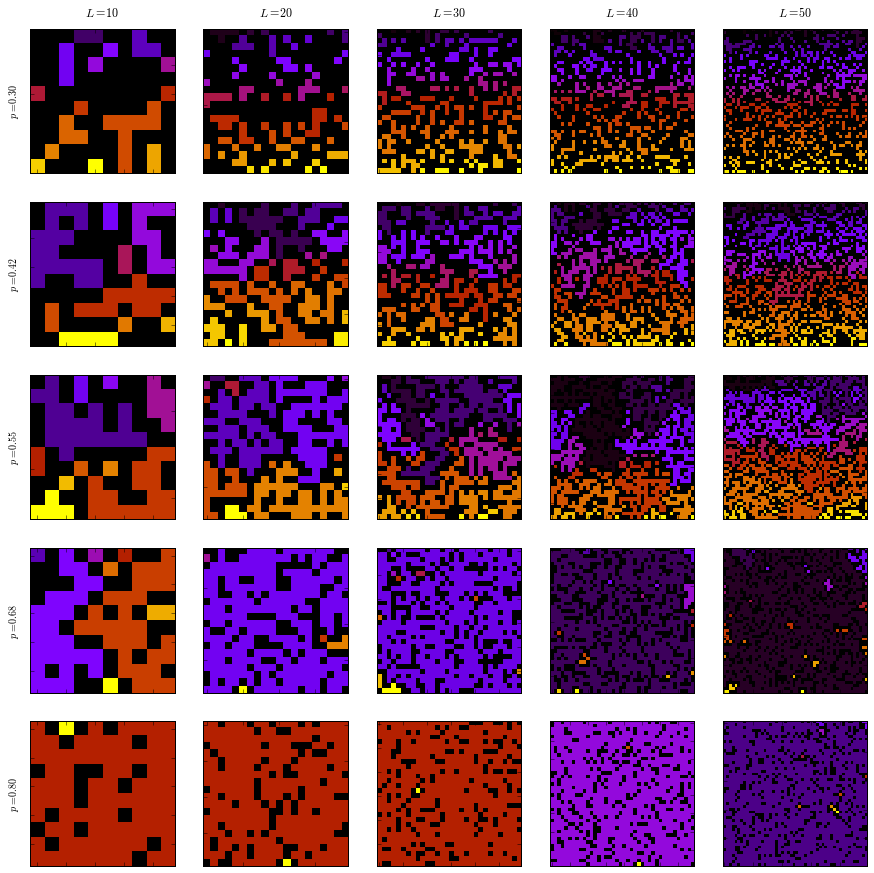

In [4]:
pylab.rcParams['figure.figsize'] = (3*numP, 3*len(Ls))

f, axarr = plt.subplots(numP, len(Ls))
for i, p in enumerate(ps):
    for j, L in enumerate(Ls):
        axarr[i, j].matshow(experimente[i][j].clusters(), cmap=cm.gnuplot)
        axarr[i, j].set_xticklabels([])
        axarr[i, j].set_yticklabels([])
        
for ax, L in zip(axarr[0], Ls):
    ax.set_title("$L = %d$" % L)

for ax, p in zip(axarr[:,0], ps):
    ax.set_ylabel("$p = %.2f$"%p)

**d.)** Bei welcher Besetzungsdichte wird das System perkolierend, d.h. es existiert ein Cluster, der sich über den Bereich $[0,L]$ in x-, bzw. y-Richtung oder in beiden Dimensionen erstreckt.

In [5]:
%%time
N = 500
ps = np.linspace(0.3, 0.8, 50)
perkolationsCounter = np.zeros(shape=(len(Ls), len(ps)), dtype=np.int32)
for i, L in enumerate(Ls):
    for j, p in enumerate(ps):
        for _ in range(N):
            e = Experiment(L, p)
            if e.perkoliert():
                perkolationsCounter[i, j] += 1

Wall time: 6min 15s


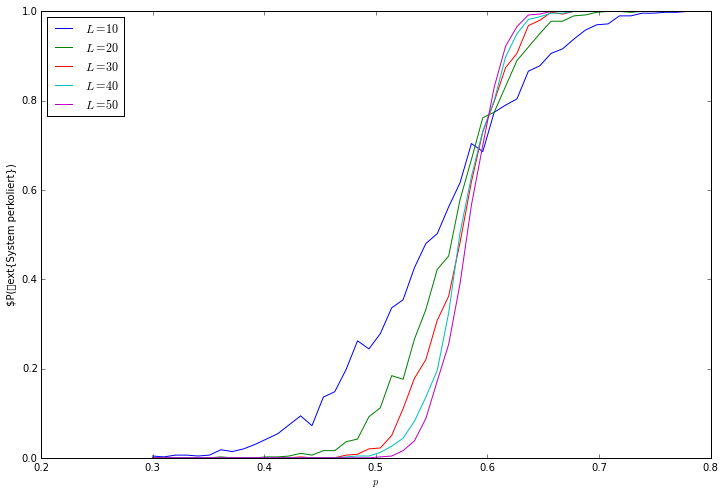

In [6]:
pylab.rcParams['figure.figsize'] = (12, 8)

for i, L in enumerate(Ls):
    pylab.plot(ps,perkolationsCounter[i]/N,  label="$L=%d$" % L)
_ = pylab.legend(loc='upper left')
pylab.xlabel("$p$")
pylab.ylabel("$P(\text{System perkoliert})")

**e.)** Wie sieht die Verteilung der Clustergrößen aus?

Bemerkung: Die Perkolationseigenschaft wird für jede Systemrealisierung eine stochastische Variable sein. Rechnen Sie daher für jede Besetzungswahrscheinlichkeit $p$, den Mittelwert $\langle \mu_p \rangle$ aus, der durch die Anzahl der perkolierenden Systeme in einer Versuchsreihe von $N(p)$ Zufallsbesetzungen mit Wahrscheinlichkeit $p$ gefunden wird.

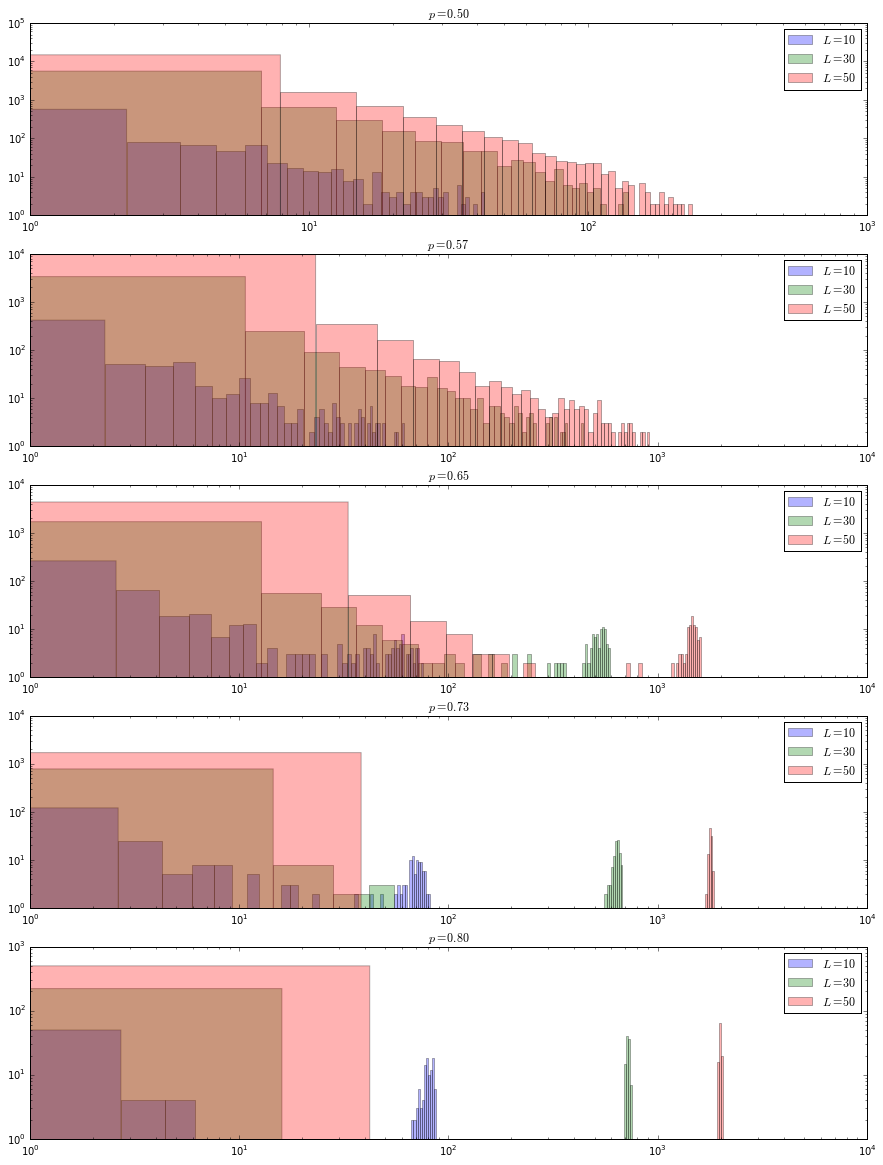

In [7]:
numP = 5
Ls = [10, 30, 50]
ps = np.linspace(0.5, 0.8, numP)
pylab.rcParams['figure.figsize'] = (15, 4*numP)

f, axarr = plt.subplots(numP)
N = 100
for i,p in enumerate(ps):
    for j,L in enumerate(Ls):
        clusterSizes = []
        for _ in range(N):
            e = Experiment(L, p)
            clusterSizes.extend(e.clusterSizes())
        a = axarr[i]
        a.set_title("$p=%.2f$"% p)
        a.hist(clusterSizes, 50, label="$L=%d$" % L, alpha = 0.3)
        a.legend()
        a.set_xscale('log')
        a.set_yscale('log')